# Tarea 3. Midiendo rendimiento y riesgo.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.maxpixel.net/static/photo/1x/Wall-Street-Dices-Over-Newspaper-Profit-Loss-Risk-2656028.jpg" width="600px" height="400px" />

**Resumen.**
> En esta tarea descargarás datos históricos de precios y, con base en ellos, calcularás rendimientos. Luego se te pedirá resumir la distribución de rendimientos para cada instrumento calculando el rendimiento medio y volatilidad. De igual manera, se te pedirá presentar dicho resumen en una base anual.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea3_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea3_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (10 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), y para 15 compañías que compongan dicho índice, durante el periodo comprendido del primero de enero del 2015 hasta el 31 de diciembre del 2019.

1. Mostrar el DataFrame de los precios diarios (5 puntos).
2. Graficar los precios (5 puntos).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web

In [3]:
def get_adj_closes(tickers, start_date=None, end_date=None):
    closes = web.DataReader(name=tickers, data_source='yahoo', start='2015-01-01', end='2019-12-31')
    closes = closes['Adj Close']
    closes.sort_index(inplace=True)
    return closes

In [5]:
names = ['^GSPC','MSFT','NFLX','WMT','ADBE','PFE','MRK','PEP','CRM','BAC','HD','UNH','XOM','KO','CSCO','IBM']
start = '2015-01-01'
end = '2019-12-31'

In [6]:
closes = get_adj_closes(tickers=names,start_date=start)
closes.head()

Symbols,^GSPC,MSFT,NFLX,WMT,ADBE,PFE,MRK,PEP,CRM,BAC,HD,UNH,XOM,KO,CSCO,IBM
Date,,,,,,,,,,,,,,,,
2015-01-02,2058.199951,41.979183,49.848572,75.800331,72.339996,25.901522,49.132111,81.511406,59.240002,16.456766,92.380165,93.161888,75.439079,35.802513,23.580675,129.241516
2015-01-05,2020.579956,41.593143,47.311428,75.579727,71.980003,25.760977,49.862339,80.898605,58.169998,15.978690,90.441994,91.627373,73.374931,35.802513,23.110941,127.207932
2015-01-06,2002.609985,40.982681,46.501427,76.162109,70.529999,25.975924,51.821095,80.285805,57.200001,15.500619,90.165108,91.442474,72.984848,36.074379,23.102396,124.464600
2015-01-07,2025.900024,41.503380,46.742859,78.182854,71.110001,26.331417,52.929340,82.633423,56.930000,15.574167,93.255470,92.376137,73.724373,36.524673,23.315914,123.651100
2015-01-08,2062.139893,42.724323,47.779999,79.833008,72.919998,26.868792,53.994629,84.135239,58.590000,15.895949,95.318672,96.785576,74.951500,36.966465,23.495266,126.338654


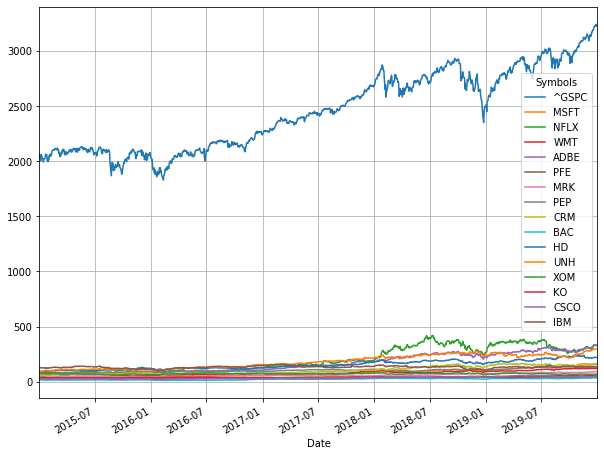

In [9]:
closes.plot(figsize=(10,8),grid=True)

## 2. Cálculo de rendimientos diarios (20 puntos)

A partir de los precios que descargaste en el anterior punto, calcular los rendimientos porcentuales diarios.

1. Mostrar el DataFrame de los rendimientos porcentuales diarios (10 puntos).
2. Graficar los rendimientos (10 puntos).

In [10]:
ret = closes.pct_change().dropna()
ret

Symbols,^GSPC,MSFT,NFLX,WMT,ADBE,PFE,MRK,PEP,CRM,BAC,HD,UNH,XOM,KO,CSCO,IBM
Date,,,,,,,,,,,,,,,,
2015-01-05,-0.018278,-0.009196,-0.050897,-0.002910,-0.004976,-0.005426,0.014863,-0.007518,-0.018062,-0.029050,-0.020980,-0.016471,-0.027362,0.000000,-0.019920,-0.015735
2015-01-06,-0.008893,-0.014677,-0.017121,0.007706,-0.020145,0.008344,0.039283,-0.007575,-0.016675,-0.029919,-0.003061,-0.002018,-0.005316,0.007593,-0.000370,-0.021566
2015-01-07,0.011630,0.012705,0.005192,0.026532,0.008223,0.013686,0.021386,0.029241,-0.004720,0.004745,0.034274,0.010210,0.010133,0.012482,0.009242,-0.006536
2015-01-08,0.017888,0.029418,0.022188,0.021106,0.025453,0.020408,0.020127,0.018174,0.029159,0.020661,0.022124,0.047734,0.016645,0.012096,0.007692,0.021735
2015-01-09,-0.008404,-0.008405,-0.015458,-0.012380,-0.014811,0.004615,-0.004614,-0.006771,-0.007339,-0.017930,-0.017148,-0.009360,-0.001410,-0.011032,0.010178,0.004356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,-0.000195,-0.000191,0.000300,0.004033,0.002098,-0.000763,-0.003270,-0.001095,-0.002993,0.001422,0.006660,-0.001864,-0.003841,-0.003642,-0.006653,-0.004205
2019-12-26,0.005128,0.008197,-0.001711,0.000084,0.004732,0.002291,-0.001094,-0.001461,0.007718,0.008518,0.000680,0.003769,0.001571,0.005666,0.001465,-0.000519
2019-12-27,0.000034,0.001828,-0.010642,0.000586,-0.001238,-0.001524,0.001752,0.006218,0.002857,-0.004786,-0.003849,0.001082,-0.003422,0.005998,-0.001672,0.002668


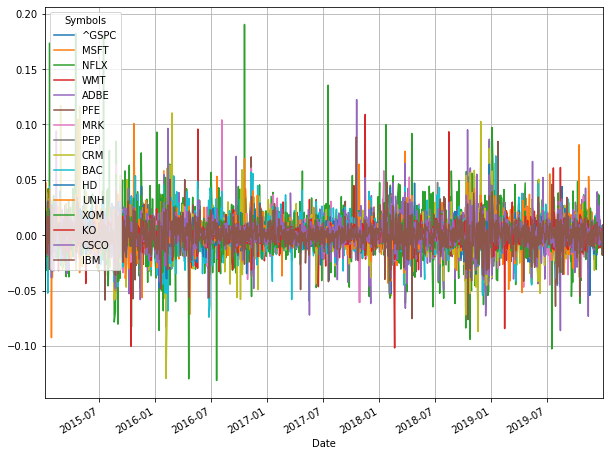

In [11]:
ret.plot(figsize=(10,8),grid=True)

## 3. Resumen de distribución de rendimientos (30 puntos)

Con base en los rendimientos que calculaste en el punto anterior:

1. Calcular el rendimiento medio diario para el índice S&P 500 y para los demás activos. Anualizar los rendimientos (15 puntos). 

2. Calcular la volatilidad diaria para el índice S&P 500 y para los demás activos. Anualizar (15 puntos).

Por favor, reportar los resultados en DataFrames tal y como lo vimos en clase.

In [29]:
r_medio_diario = pd.DataFrame(data={'R Medio Diario':ret.mean()},index=ret.columns)
r_medio_diario

,R Medio Diario
Symbols,
^GSPC,0.000395
MSFT,0.001161
NFLX,0.001829
WMT,0.000434
ADBE,0.001344
PFE,0.000386
MRK,0.000565
PEP,0.000453
CRM,0.000970


In [30]:
vol_diaria = pd.DataFrame(data={'Vol Diaria':ret.std()},index=ret.columns)
vol_diaria

,Vol Diaria
Symbols,
^GSPC,0.008466
MSFT,0.014686
NFLX,0.026253
WMT,0.012338
ADBE,0.016554
PFE,0.011363
MRK,0.012278
PEP,0.009115
CRM,0.018249


In [31]:
resumen_anual = pd.DataFrame(data={'Media':252*ret.mean(),'Volatilidad':np.sqrt(252)*ret.std()},index=ret.columns)
resumen_anual

,Media,Volatilidad
Symbols,,
^GSPC,0.099454,0.134390
MSFT,0.292548,0.233130
NFLX,0.460873,0.416752
WMT,0.109310,0.195857
ADBE,0.338793,0.262788
PFE,0.097198,0.180386
MRK,0.142400,0.194903
PEP,0.114099,0.144693
CRM,0.244431,0.289692


## 4. Gráfico rendimientos esperados vs. volatilidad (40 puntos)

Graficar los rendimientos medios anuales contra las desviaciones estándar del índice S&P 500 y de los demás activos. Como vimos en clase, la volatilidad debe ir en el eje $x$ y el rendimiento esperado en el eje $y$. Se deben etiquetar los ejes y dar detalles para un completo entendimiento de la gráfica.

1. Gráfico (10 puntos).
2. Ajuste una línea recta a los puntos obtenidos. Dar la ecuación (10 puntos).
3. A partir del gráfico y de la línea recta ajustada, concluya acerca de la relación rendimiento/riesgo (20 puntos).

Text(0.20566605275919658, 0.026431064948118817, 'IBM')

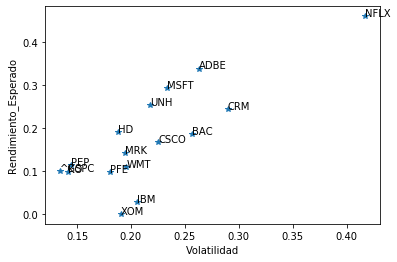

In [32]:
x_points =  resumen_anual['Volatilidad']
y_points = resumen_anual['Media']
plt.figure()
plt.plot(x_points, y_points, '*')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento_Esperado')
plt.text(resumen_anual.loc['^GSPC','Volatilidad'],resumen_anual.loc['^GSPC','Media'], '^GSPC')
plt.text(resumen_anual.loc['MSFT','Volatilidad'],resumen_anual.loc['MSFT','Media'], 'MSFT')
plt.text(resumen_anual.loc['NFLX','Volatilidad'],resumen_anual.loc['NFLX','Media'], 'NFLX')
plt.text(resumen_anual.loc['WMT','Volatilidad'],resumen_anual.loc['WMT','Media'], 'WMT')
plt.text(resumen_anual.loc['ADBE','Volatilidad'],resumen_anual.loc['ADBE','Media'], 'ADBE')
plt.text(resumen_anual.loc['PFE','Volatilidad'],resumen_anual.loc['PFE','Media'], 'PFE')
plt.text(resumen_anual.loc['MRK','Volatilidad'],resumen_anual.loc['MRK','Media'], 'MRK')
plt.text(resumen_anual.loc['PEP','Volatilidad'],resumen_anual.loc['PEP','Media'], 'PEP')
plt.text(resumen_anual.loc['CRM','Volatilidad'],resumen_anual.loc['CRM','Media'], 'CRM')
plt.text(resumen_anual.loc['BAC','Volatilidad'],resumen_anual.loc['BAC','Media'], 'BAC')
plt.text(resumen_anual.loc['HD','Volatilidad'],resumen_anual.loc['HD','Media'], 'HD')
plt.text(resumen_anual.loc['UNH','Volatilidad'],resumen_anual.loc['UNH','Media'], 'UNH')
plt.text(resumen_anual.loc['XOM','Volatilidad'],resumen_anual.loc['XOM','Media'], 'XOM')
plt.text(resumen_anual.loc['KO','Volatilidad'],resumen_anual.loc['KO','Media'], 'KO')
plt.text(resumen_anual.loc['CSCO','Volatilidad'],resumen_anual.loc['CSCO','Media'], 'CSCO')
plt.text(resumen_anual.loc['IBM','Volatilidad'],resumen_anual.loc['IBM','Media'], 'IBM')

In [33]:
import scipy.optimize as opt

In [34]:
def obj_fun(beta, Er, sigma):
    return ((Er - (beta[0] + beta[1] * sigma))**2).sum()

beta_0 = [0, 1]

In [35]:
sol = opt.minimize(obj_fun, beta_0, args=(y_points, x_points))
sol

      fun: 0.0743571022630093
 hess_inv: array([[ 0.36469753, -1.53346874],
       [-1.53346874,  7.05216324]])
      jac: array([-1.86264515e-09, -2.79396772e-09])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-0.12849275,  1.40117652])

In [36]:
beta = sol.x
beta

array([-0.12849275,  1.40117652])

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>

In [37]:
x_points

Symbols
^GSPC    0.134390
MSFT     0.233130
NFLX     0.416752
WMT      0.195857
ADBE     0.262788
PFE      0.180386
MRK      0.194903
PEP      0.144693
CRM      0.289692
BAC      0.257098
HD       0.188311
UNH      0.217996
XOM      0.190348
KO       0.141575
CSCO     0.225561
IBM      0.205666
Name: Volatilidad, dtype: float64

In [38]:
y_points

Symbols
^GSPC    0.099454
MSFT     0.292548
NFLX     0.460873
WMT      0.109310
ADBE     0.338793
PFE      0.097198
MRK      0.142400
PEP      0.114099
CRM      0.244431
BAC      0.185644
HD       0.190273
UNH      0.254176
XOM     -0.000381
KO       0.097417
CSCO     0.166345
IBM      0.026431
Name: Media, dtype: float64

In [39]:
y_points = y_points[np.sort(x_points)]
x_points = np.sort(x_points)

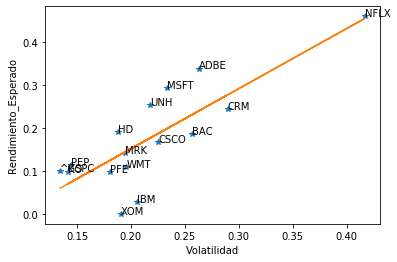

In [41]:
x_points =  resumen_anual['Volatilidad']
y_points = resumen_anual['Media']
plt.figure()
plt.plot(x_points, y_points, '*')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento_Esperado')
plt.text(resumen_anual.loc['^GSPC','Volatilidad'],resumen_anual.loc['^GSPC','Media'], '^GSPC')
plt.text(resumen_anual.loc['MSFT','Volatilidad'],resumen_anual.loc['MSFT','Media'], 'MSFT')
plt.text(resumen_anual.loc['NFLX','Volatilidad'],resumen_anual.loc['NFLX','Media'], 'NFLX')
plt.text(resumen_anual.loc['WMT','Volatilidad'],resumen_anual.loc['WMT','Media'], 'WMT')
plt.text(resumen_anual.loc['ADBE','Volatilidad'],resumen_anual.loc['ADBE','Media'], 'ADBE')
plt.text(resumen_anual.loc['PFE','Volatilidad'],resumen_anual.loc['PFE','Media'], 'PFE')
plt.text(resumen_anual.loc['MRK','Volatilidad'],resumen_anual.loc['MRK','Media'], 'MRK')
plt.text(resumen_anual.loc['PEP','Volatilidad'],resumen_anual.loc['PEP','Media'], 'PEP')
plt.text(resumen_anual.loc['CRM','Volatilidad'],resumen_anual.loc['CRM','Media'], 'CRM')
plt.text(resumen_anual.loc['BAC','Volatilidad'],resumen_anual.loc['BAC','Media'], 'BAC')
plt.text(resumen_anual.loc['HD','Volatilidad'],resumen_anual.loc['HD','Media'], 'HD')
plt.text(resumen_anual.loc['UNH','Volatilidad'],resumen_anual.loc['UNH','Media'], 'UNH')
plt.text(resumen_anual.loc['XOM','Volatilidad'],resumen_anual.loc['XOM','Media'], 'XOM')
plt.text(resumen_anual.loc['KO','Volatilidad'],resumen_anual.loc['KO','Media'], 'KO')
plt.text(resumen_anual.loc['CSCO','Volatilidad'],resumen_anual.loc['CSCO','Media'], 'CSCO')
plt.text(resumen_anual.loc['IBM','Volatilidad'],resumen_anual.loc['IBM','Media'], 'IBM')
plt.plot(x_points, beta[0] + beta[1] * x_points)

Como se ve en las gráficas, cuando esperamos mayores rendimientos, la volatilidad igual aumenta, por lo que asumimos un riesgo mayor. 
La pendiente de la recta es positiva por la relación que hay entre el  riesgo y el rendimiento esperado.